In [55]:
import numpy as np
from scipy import stats 
import random 
import pandas as pd
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('events_AB_test.csv') #Загрузить данные из файла events_AB_test.csv

In [57]:
df

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [52]:
type(df) #тип таблицы

pandas.core.frame.DataFrame

In [54]:
df.shape #размер датасета

(100000, 4)

In [32]:
df.head(5) #вывести первые 5 строк таблицы

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [33]:
df.info() #тип данных колонок таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


In [34]:
df.isnull() #проверка на наличие пропущенных значений

,id,group,segment,events
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [35]:
#Провести описательную статистику по группам (control и test)
control = df[df['group']=='control']['events']  
test = df[df['group']=='test']['events']

In [36]:
#Провести описательную статистику по сегментам (high и low): среднее, медиана, стандартное отклонение
high = df[df['segment']=='high']['events'] 
low = df[df['segment']=='low']['events']

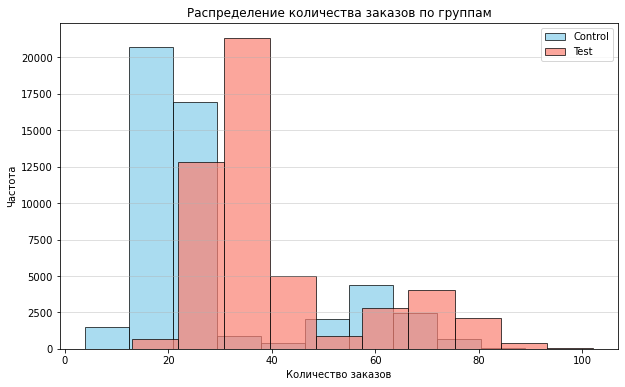

In [62]:
#Построить гистограммы распределения количества заказов по группам (control и test).
plt.figure(figsize=(10, 6)) # Устанавливаем размер графика
# Построение гистограммы для группы control
plt.hist(control, bins=10, alpha=0.7, label='Control', color='skyblue', edgecolor='black') 

# Построение гистограммы для группы test
plt.hist(test, bins=10, alpha=0.7, label='Test', color='salmon', edgecolor='black')

# Добавление меток осей и заголовка
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
plt.title('Распределение количества заказов по группам')
plt.legend() # Отображение легенды

# Отображение графика
plt.grid(axis='y', alpha=0.5) # Добавляем горизонтальную сетку для лучшей читаемости графика
plt.show()

#data: Массив или список данных для построения гистограммы
#bins: Количество столбцов (интервалов) гистограммы.
#alpha: Прозрачность столбцов, чтобы было видно перекрывающиеся области.
#label: Метка для легенды.
#color: Цвет столбцов.
#edgecolor: Цвет границ столбцов.

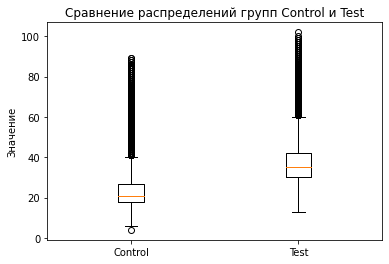

In [63]:
#Построить боксплоты (box plots) для наглядного сравнения распределений в группах
# Список данных для построения боксплотов
data_to_plot = [control, test]

# Создание фигуры и осей
fig, ax = plt.subplots()

# Построение боксплотов
bp = ax.boxplot(data_to_plot)

# Настройка меток по оси X
ax.set_xticklabels(['Control', 'Test'])

# Настройка заголовка и меток осей
ax.set_title('Сравнение распределений групп Control и Test')
ax.set_ylabel('Значение')

# Отображение графика
plt.show()

In [37]:
#Импорт библиотек для A/B-теста
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest
from scipy.stats import mannwhitneyu

In [46]:
#проверка на нормальность Шапиро-Уилко для control (0.74>0.05 - значит не нормальное распределеение)
#Если p-value меньше 0.05: Нулевая гипотеза отвергается, и можно заключить, что данные не нормально распределены. 
#Если p-value больше 0.05: Нет оснований отвергать нулевую гипотезу, и можно предположить, что данные нормально распределены.

shapiro(control)


ShapiroResult(statistic=0.7442706823348999, pvalue=0.0)

In [47]:
#проверка на нормальность Шапиро-Уилко для test
#Если p-value меньше 0.05: Нулевая гипотеза отвергается, и можно заключить, что данные не нормально распределены. 
#Если p-value больше 0.05: Нет оснований отвергать нулевую гипотезу, и можно предположить, что данные нормально распределены.

shapiro(test)

ShapiroResult(statistic=0.8111791610717773, pvalue=0.0)

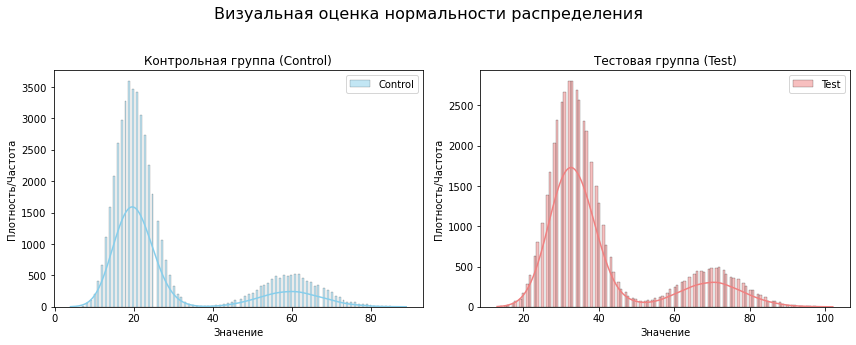

In [64]:
#Построить график визуальной оценки нормальности распределения
# Создание двух подграфиков (subplots). Создает одну фигуру (fig) и два пустых подграфика (axes) на ней. Задан один ряд и два столбца
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 


# График для группы Control
sns.histplot(control, kde=True, ax=axes[0], color='skyblue', label='Control')
axes[0].set_title('Контрольная группа (Control)')
axes[0].set_xlabel('Значение')
axes[0].set_ylabel('Плотность/Частота')
axes[0].legend()

# График для группы Test
sns.histplot(test, kde=True, ax=axes[1], color='lightcoral', label='Test')
axes[1].set_title('Тестовая группа (Test)')
axes[1].set_xlabel('Значение')
axes[1].set_ylabel('Плотность/Частота')
axes[1].legend()

# Добавление общего заголовка и отображение графика
fig.suptitle('Визуальная оценка нормальности распределения', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Улучшает расположение подграфиков
plt.show()

#data: Данные для построения графика.
#kde=True: Добавляет на гистограмму график оценки плотности ядра (Kernel Density Estimate), который сглаживает распределение и помогает визуально сравнить его с нормальной кривой.
#ax=axes[i]: Указывает, на каком из созданных подграфиков рисовать.
#color и label: Задают цвета и метки для легенды.

In [40]:
#Сформулировать нулевую (H0) и альтернативную (H1) гипотезы
#H0: после обновления кнопки заказов количество клиентов не изменилось
#H1: после обновления кнопки заказов количество клиентов изменилось

In [41]:
#A/B тест Манна-Уитни (потому что у нас не параметрический тест, наши данные распределены не нормально) т.к. p >0.05 различия нет (иначе есть)
mannwhitneyu(control,test)

MannwhitneyuResult(statistic=476153686.0, pvalue=0.0)

In [42]:
control

10000    47.0
10001    66.0
10002    60.0
10003    74.0
10004    56.0
         ... 
99995    15.0
99996    16.0
99997    22.0
99998    21.0
99999    23.0
Name: events, Length: 50000, dtype: float64

In [43]:
test

0        78.0
1        71.0
2        80.0
3        80.0
4        78.0
         ... 
59995    35.0
59996    31.0
59997    32.0
59998    18.0
59999    31.0
Name: events, Length: 50000, dtype: float64

In [ ]:
#p-value < 0,05 => гипотеза H1 верна: после обновления кнопки заказов количество клиентов изменилось